In [58]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [60]:
#API command
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:08<00:00, 212MB/s]
100% 1.06G/1.06G [00:08<00:00, 138MB/s]


In [61]:
from zipfile import ZipFile
zip_ref = ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [86]:
from tensorflow import keras
import tensorflow as tf
tf.random.set_seed(22)

train_data = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256),
    class_names = ['cats','dogs']

)

test_data = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256),
    class_names= ['cats','dogs']
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [87]:
#Normalize the data
import tensorflow as tf
def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

train_data = train_data.map(process)
test_data = test_data.map(process)

In [88]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [89]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation ='relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [90]:
#summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 30, 30, 128)      

In [91]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [92]:
history = model.fit(train_data, epochs=10, validation_data=test_data)

Epoch 1/10
625/625 [==============================] - 53s 81ms/step - loss: 0.6311 - accuracy: 0.6469 - val_loss: 0.5549 - val_accuracy: 0.7130
Epoch 2/10
625/625 [==============================] - 54s 87ms/step - loss: 0.4960 - accuracy: 0.7588 - val_loss: 0.4872 - val_accuracy: 0.7616
Epoch 3/10
625/625 [==============================] - 55s 88ms/step - loss: 0.4015 - accuracy: 0.8138 - val_loss: 0.4963 - val_accuracy: 0.7880
Epoch 4/10
625/625 [==============================] - 51s 80ms/step - loss: 0.2681 - accuracy: 0.8855 - val_loss: 0.7108 - val_accuracy: 0.7770
Epoch 5/10
625/625 [==============================] - 51s 81ms/step - loss: 0.1453 - accuracy: 0.9431 - val_loss: 0.7318 - val_accuracy: 0.7782
Epoch 6/10
625/625 [==============================] - 54s 85ms/step - loss: 0.0899 - accuracy: 0.9671 - val_loss: 0.9823 - val_accuracy: 0.7778
Epoch 7/10
625/625 [==============================] - 57s 91ms/step - loss: 0.0602 - accuracy: 0.9792 - val_loss: 1.2173 - val_accuracy:

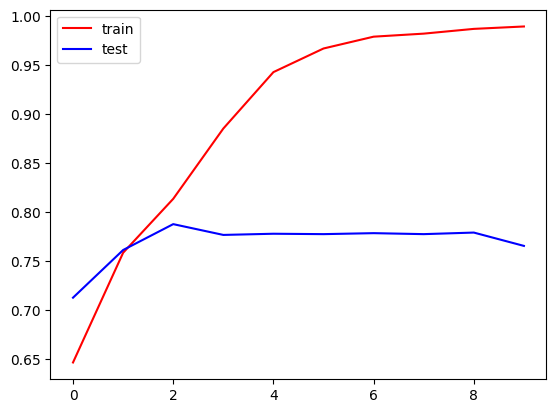

In [93]:
#Show the accurary of training and testing graphically
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color = 'red', label='train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'test')
plt.legend()
plt.show()

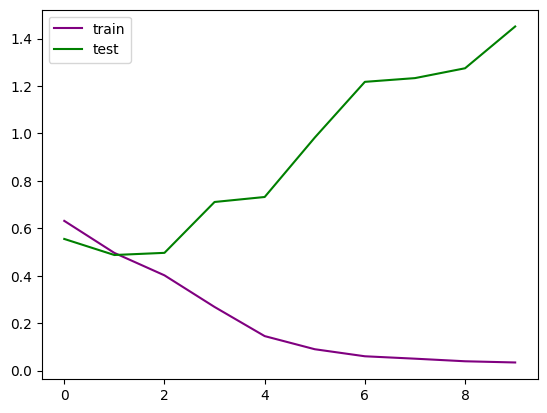

In [94]:
#Show the lose function of training  and testing graphically
plt.plot(history.history['loss'],color = 'purple', label='train')
plt.plot(history.history['val_loss'], color = 'green', label = 'test')
plt.legend()
plt.show()

In [95]:
model_1 = Sequential()

model_1.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size = (2,2), strides=2, padding='valid'))

model_1.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size = (2,2), strides=2, padding='valid'))

model_1.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size = (2,2), strides=2, padding='valid'))

model_1.add(Flatten())

model_1.add(Dense(128, activation ='relu'))
model_1.add(Dropout(0.1))
model_1.add(Dense(64,activation = 'relu'))
model_1.add(Dropout(0.1))
model_1.add(Dense(1, activation = 'sigmoid'))


In [96]:
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_9 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_10 (Ba  (None, 125, 125, 64)      256       
 tchNormalization)                                               
                                                      

In [97]:
model_1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [98]:
history = model_1.fit(train_data, epochs=10, validation_data=test_data)

Epoch 1/10
625/625 [==============================] - 69s 106ms/step - loss: 1.4396 - accuracy: 0.5629 - val_loss: 0.7322 - val_accuracy: 0.5644
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.6102 - accuracy: 0.6612 - val_loss: 0.7979 - val_accuracy: 0.6052
Epoch 3/10
625/625 [==============================] - 66s 106ms/step - loss: 0.5316 - accuracy: 0.7294 - val_loss: 0.5239 - val_accuracy: 0.7470
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4659 - accuracy: 0.7753 - val_loss: 0.5226 - val_accuracy: 0.7502
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4250 - accuracy: 0.8001 - val_loss: 0.5366 - val_accuracy: 0.7394
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3990 - accuracy: 0.8191 - val_loss: 0.6848 - val_accuracy: 0.6062
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3420 - accuracy: 0.8449 - val_loss: 0.4173 - val_ac

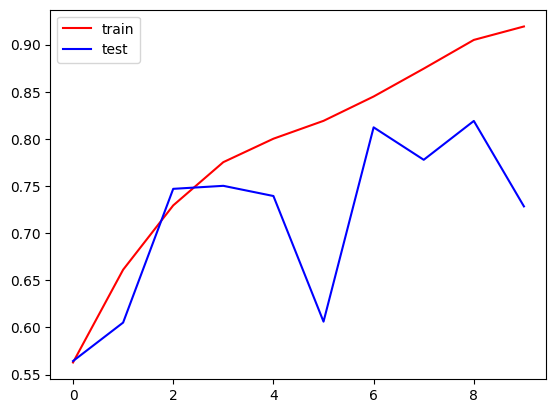

In [99]:
#show the accuracy of the model graphically
plt.plot(history.history['accuracy'],color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color='blue', label = 'test')
plt.legend()
plt.show()

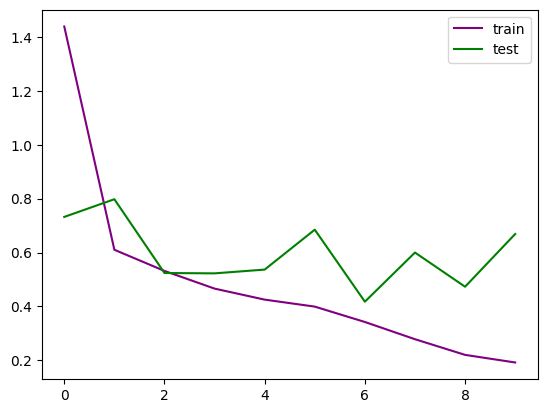

In [100]:
#Show the lose function of training  and testing graphically
plt.plot(history.history['loss'],color = 'purple', label='train')
plt.plot(history.history['val_loss'], color = 'green', label = 'test')
plt.legend()
plt.show()

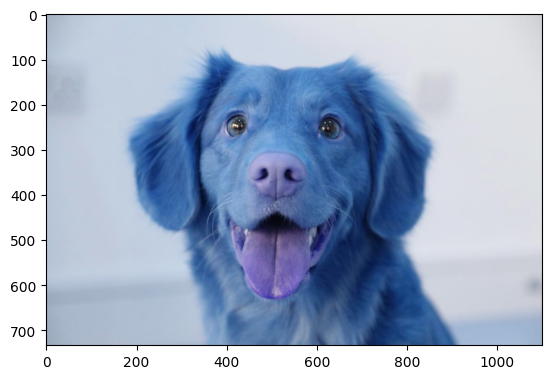

In [101]:
import cv2
new_image = cv2.imread("/content/Dog.jpg")
plt.imshow(new_image)

In [102]:
new_image.shape

(734, 1100, 3)

In [103]:
#resize
new_image = cv2.resize(new_image,(256,256))
#reshape
new_input = new_image.reshape((1,256,256,3))

In [104]:
model_1.predict(new_input)

1/1 [==============================] - 0s 103ms/step


array([[1.]], dtype=float32)